In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numba as nb
import numpy as np

from consav.linear_interp import interp_1d
from consav.linear_interp import interp_2d
from consav.linear_interp import interp_2d_vec

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from DynLaborModel import DynLaborModelClass

# different models
model = DynLaborModelClass(
    par={'T': 10, 'r': 0.02, 'rho': 1/(1.02), 'alpha': 0.0})
model_egm = DynLaborModelClass(
    par={'T': 10, 'r': 0.02, 'rho': 1/(1.02), 'alpha': 0.0})

par = model.par
sol = model.sol
sim = model.sim


In [3]:
model.solve(method='vfi')

In [4]:
model_egm.solve(method='egm')

## Solve the model

#### Difference between egm solution and vfi

[Text(0.5, 0, 'savings'), Text(0, 0.5, 'diff, egm vs. vfi')]

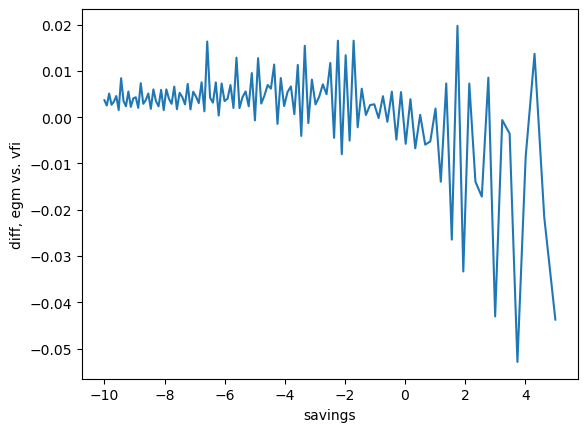

In [5]:
T = model_egm.par.T - 2
diff = model.sol.c[T,:,0] - model_egm.sol.c[T,:,0]

ax = plt.subplot(1,1,1)

ax.plot(par.a_grid, diff)
ax.set(xlabel='savings', ylabel='diff, egm vs. vfi')

# seems a bit unstable, but errors are relatively small..

# Elasticities and Responsiveness

In [6]:
def calc_frisch(model, method = "vfi"):
    # simulate Frisch elasticity in the 1st period: Anticipated transitory increase in wage
    model.simulate()

    period = 1
    pct = 1
    model_F = model.copy()
    model_F.par.w_vec[period-1] = model_F.par.w_vec[period-1]*(1.0 +pct/100) # increase by 1% in first period -> easiest because we do not need two models

    model_F.solve(method = method)
    model_F.simulate()

    ela_Fi = (model_F.sim.h - model.sim.h)/model.sim.h*100
    # Theoretical if no human capital
    ela_F_noHC = 1/par.gamma
    

    print(f'Theoretical, w. alpha = 0.0:        {ela_F_noHC:2.3f} \nSimulated elasticity, w. alpha={par.alpha:2.1f}: {ela_Fi[0,period-1]:2.3f}')

    # check model solution [first point in human capital grid]
    t = 0
    diff = (model_F.sol.h[t] - model.sol.h[t])/model.sol.h[t]/(pct/100)
    fig, ax = plt.subplots()
    ax.plot(model_F.par.a_grid, diff[:,0]);
    ax.set(xlabel='Wealth, $a_{T}$',ylabel='ela_f');

    return model_F

def calc_marshall(model, method = "vfi"):
    model.simulate()

    # simulate Marshall elasticity in the first period
    model_1pct = model.copy()
    model_1pct.par.w_vec[:] = model_1pct.par.w_vec[:]*1.01

    model_1pct.solve(method = method)
    model_1pct.simulate()

    ela_Mi = (model_1pct.sim.h - model.sim.h)/model.sim.h*100
    # Theoretical Marshall elasticity if \alpha=0
    ela_M_noHC = (1+par.eta) / (par.gamma - par.eta) 

    print(f'Theoretical, w. alpha = 0.0:        {ela_M_noHC:2.3f} \nSimulated elasticity, w. alpha={par.alpha:2.1f}: {ela_Mi[0,0]:2.5}')

In [7]:
model_F = calc_marshall(model_egm, method = "egm")

Theoretical, w. alpha = 0.0:        -0.222 
Simulated elasticity, w. alpha=0.0: -0.22072


Theoretical, w. alpha = 0.0:        0.400 
Simulated elasticity, w. alpha=0.0: 0.330


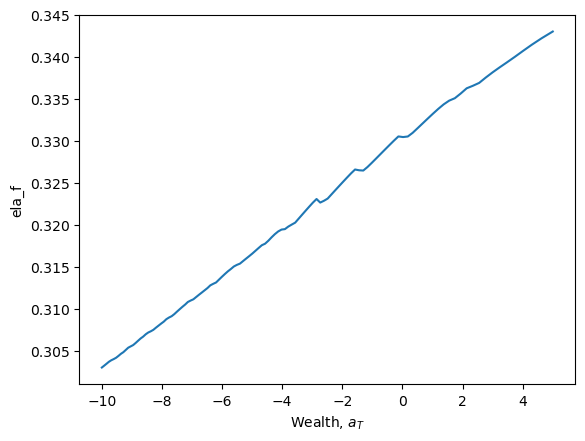

In [8]:
model_F = calc_frisch(model_egm, method = "egm")
# looks a bit weird, maybe I made a mistake...